In [ ]:
import cv2
cv2.__version__

'4.10.0'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/dltpdn/insightbook.opencv_project_python

Cloning into 'insightbook.opencv_project_python'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 469 (delta 23), reused 38 (delta 16), pack-reused 389 (from 1)
Receiving objects: 100% (469/469), 30.72 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Updating files: 100% (370/370), done.


#9장 머신러닝

In [ ]:
%cd /content/insightbook.opencv_project_python/09.ml

/content/insightbook.opencv_project_python/09.ml


##9.1 OpenCV와 머신러닝

### 9.1.1 머신러닝

### 9.1.2 OpenCV와 머신러닝

##9.2 k-means 클러스터

### 9.2.1 k-means 알고리즘

In [ ]:
!python k-means_random.py

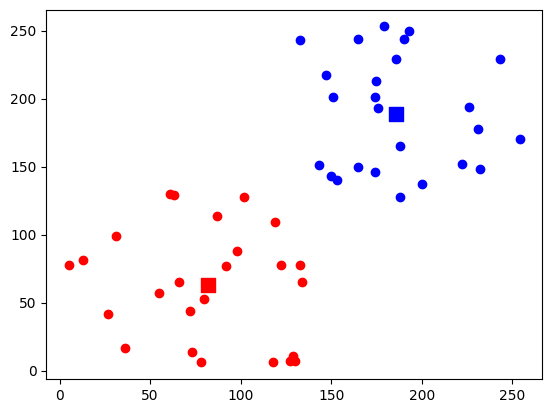

In [ ]:
import numpy as np, cv2
import matplotlib.pyplot as plt

# 0~150 임의의 2수, 25개 ---①
a = np.random.randint(0,150,(25,2))
# 128~255 임의의 2수, 25개  ---②
b = np.random.randint(128, 255,(25,2))
# a, b를 병합 ---③
data = np.vstack((a,b)).astype(np.float32)
# 중지 요건 ---④
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# 평균 클러스터링 적용 ---⑤
ret,label,center=cv2.kmeans(data,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# label에 따라 결과 분류 ---⑥
red = data[label.ravel()==0]
blue = data[label.ravel()==1]

# plot에 결과 출력 ---⑦
plt.scatter(red[:,0],red[:,1], c='r')
plt.scatter(blue[:,0],blue[:,1], c='b')
# 각 그룹의 중앙점 출력 ---⑧
plt.scatter(center[0,0],center[0,1], s=100, c='r', marker='s')
plt.scatter(center[1,0],center[1,1], s=100, c='b', marker='s')
plt.show()

In [ ]:
!python k-means_color.py

[[ 20  17 148]
 [129 109  73]
 [104  56  25]
 [ 73  74 183]
 [201 132  49]
 [ 17 106 129]
 [202 205 205]
 [147 150 149]
 [ 53 182 197]
 [188 190 189]
 [158 134  89]
 [204 170 116]
 [154  84  22]
 [  9 140 180]
 [213 216 218]
 [ 58  26  12]]


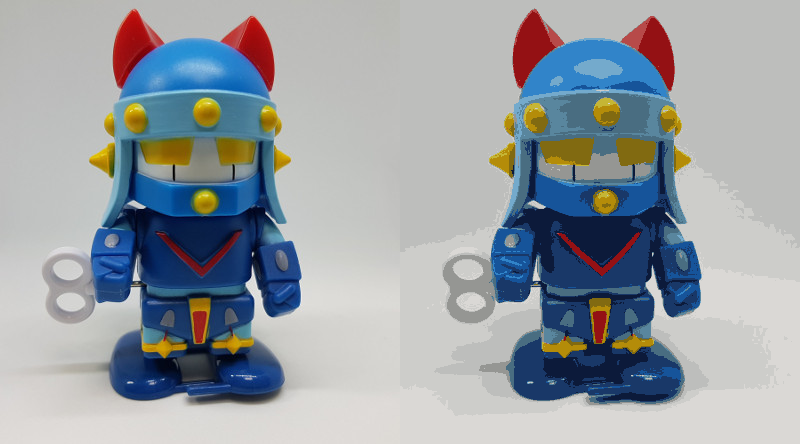

In [ ]:
import numpy as np
import cv2

K = 16 # 군집화 갯수(16컬러) ---①
img = cv2.imread('../img/taekwonv1.jpg')
# 군집화를 위한 데이타 구조와 형식 변환 ---②
data = img.reshape((-1,3)).astype(np.float32)
# 반복 중지 요건 ---③
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# 평균 클러스터링 적용 ---④
ret,label,center=cv2.kmeans(data,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# 중심 값을 정수형으로 변환 ---⑤
center = np.uint8(center)
print(center)
# 각 레이블에 해당하는 중심값으로 픽셀 값 선택 ---⑥
res = center[label.flatten()]
# 원본 영상의 형태로 변환 ---⑦
res = res.reshape((img.shape))
# 결과 출력 ---⑧
merged = np.hstack((img, res))
#cv2.imshow('KMeans Color',merged)
cv2_imshow(merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 9.2.2 숫자 손글씨 군집화

In [ ]:
!python mnist.py

In [ ]:
import numpy as np, cv2

data = None  # 이미지 데이타 셋
k = list(range(10)) # [0,1,2,3,4,5,6,7,8,9] 레이블 셋

# 이미지 데이타 읽어들이는 함수 ---①
def load():
    global data
    # 0~9 각각 500(5x100)개, 총5000(50x100)개, 한 숫자당 400(20x20)픽셀
    image = cv2.imread('../img/digits.png')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # 숫자 한개(20x20)씩 구분하기 위해 행별(50)로 나누고 열별(100)로 나누기
    cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
    # 리스트를 NumPy 배열로  변환 (50 x 100 x 20 x 20 )
    data = np.array(cells)

# 모든 숫자 데이타 반환 ---②
def getData(reshape=True):
    if data is None: load() # 이미지 읽기 확인
    # 모든 데이타를 N x 400 형태로 변환
    if reshape:
        full = data.reshape(-1, 400).astype(np.float32) # 5000x400
    else:
        full = data
    labels = np.repeat(k,500).reshape(-1,1)  # 각 숫자당 500번 반복(10x500)
    return (full, labels)

# 훈련용 데이타 반환 ---③
def getTrain(reshape=True):
    if data is None: load() # 이미지 읽기 확인
    # 50x100 중에 90열만 훈련 데이타로 사용
    train = data[:,:90]
    if reshape:
        # 훈련 데이타를 N X 400으로 변환
        train = train.reshape(-1,400).astype(np.float32) # 4500x400
    # 레이블 생성
    train_labels = np.repeat(k,450).reshape(-1,1) # 각 숫자당 45번 반복(10x450)
    return (train, train_labels)

# 테스트용 데이타 반환 ---④
def getTest(reshape=True):
    if data is None: load()
    # 50x100 중에 마지막 10열만 훈련 데이타로 사용
    test = data[:,90:100]
    # 테스트 데이타를 N x 400으로 변환
    if reshape:
        test = test.reshape(-1,400).astype(np.float32) # 500x400
    test_labels = np.repeat(k,50).reshape(-1,1)
    return (test, test_labels)


# 손글씨 숫자 한 개를 20x20 로 변환후에 1x400 형태로 변환 ---⑤
def digit2data(src, reshape=True):
    h, w = src.shape[:2]
    square = src
    # 정사각형 형태로 만들기
    if h > w:
        pad = (h - w)//2
        square = np.zeros((h, h), dtype=np.uint8)
        square[:, pad:pad+w] = src
    elif w > h :
        pad = (w - h)//2
        square = np.zeros((w, w), dtype=np.uint8)
        square[pad:pad+h, :] = src
    # 0으로 채워진 20x20 이미지 생성
    px20 = np.zeros((20,20), np.uint8)
    # 원본을 16x16으로 축소해서 테두리 2픽셀 확보
    px20[2:18, 2:18] = cv2.resize(square, (16,16), interpolation=cv2.INTER_AREA)
    if reshape:
        # 1x400형태로 변환
        px20 = px20.reshape((1,400)).astype(np.float32)
    return px20

In [ ]:
!python k-means_handwritten.py

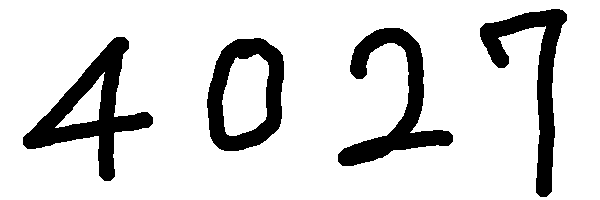

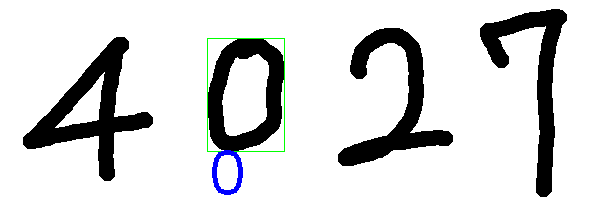

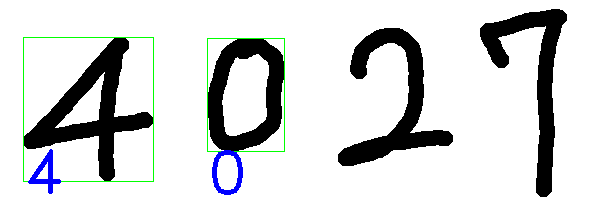

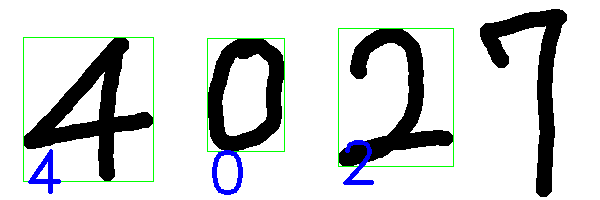

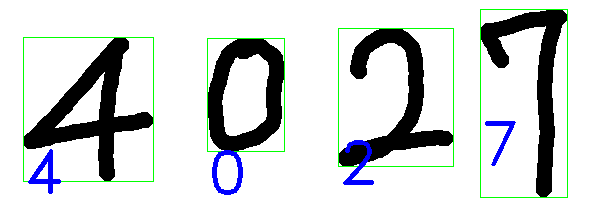

In [ ]:
import numpy as np, cv2
import mnist

# 훈련 데이타 가져오기 ---①
train, train_labels = mnist.getData()
# Knn 객체 생성 및 학습 ---②
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

# 인식시킬 손글씨 이미지 읽기 ---③
image = cv2.imread('../img/4027.png')
#cv2.imshow("image", image)
cv2_imshow(image)
cv2.waitKey(0)

# 그레이 스케일 변환과 스레시홀드 ---④
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
_, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
# 최외곽 컨투어만 찾기 ---⑤
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)[-2:]
# 모든 컨투어 순회 ---⑥
for c in contours:
    # 컨투어를 감싸는 외접 사각형으로 숫자 영역 좌표 구하기 ---⑦
    (x, y, w, h) = cv2.boundingRect(c)
    # 외접 사각형의 크기가 너무 작은것은 제외 ---⑧
    if w >= 5 and h >= 25:
        # 숫자 영역만 roi로 확보하고 사각형 그리기 ---⑨
        roi = gray[y:y + h, x:x + w]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        # 테스트 데이타 형식으로 변환 ---⑩
        data = mnist.digit2data(roi)
        # 결과 예측해서 이미지에 표시---⑪
        ret, result, neighbours, dist = knn.findNearest(data, k=1)
        cv2.putText(image, "%d"%ret, (x , y + 155), \
                        cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2)
        #cv2.imshow("image", image)
        cv2_imshow(image)
        cv2.waitKey(0)
cv2.destroyAllWindows()

##9.3 k-NN

### 9.3.1 k-NN 알고리즘

In [ ]:
!python kNN_random.py

ret:1.0, result:[[1.]], negibours:[[1. 0. 1.]], distance:[[5792. 5858. 5945.]]


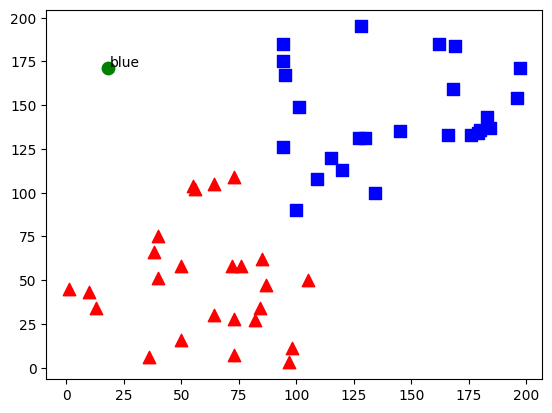

In [ ]:
import cv2,  numpy as np,  matplotlib.pyplot as plt

# 0~200 사이의 무작위 수 50x2개 데이타 생성 ---①
red = np.random.randint(0, 110, (25,2)).astype(np.float32)
blue = np.random.randint(90, 200, (25, 2)).astype(np.float32)
trainData = np.vstack((red, blue))

# 50x1개 레이블 생성 ---②
labels = np.zeros((50,1), dtype=np.float32) # 0:빨강색 삼각형
labels[25:] = 1           # 1:파랑색 사각형

# 레이블 값 0과 같은 자리는 red, 1과 같은 자리는 blue로 분류해서 표시
plt.scatter(red[:,0], red[:,1], 80, 'r', '^') # 빨강색 삼각형
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')# 파랑색 사각형

# 0 ~ 200 사이의 1개의 새로운 무작위 수 생성 ---③
newcomer = np.random.randint(0,200,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o') # 초록색 원

# KNearest 알고리즘 객체 생성 ---④
knn = cv2.ml.KNearest_create()
# train, 행 단위 샘플 ---⑤
knn.train(trainData, cv2.ml.ROW_SAMPLE, labels)
# 예측 ---⑥
#ret, results = knn.predict(newcomer)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)#K=3
# 결과 출력
print('ret:%s, result:%s, negibours:%s, distance:%s' \
        %(ret,results, neighbours, dist))
plt.annotate('red' if ret==0.0 else 'blue', xy=newcomer[0], \
             xytext=(newcomer[0]+1))
plt.show()

In [ ]:
!python kNN_movie.py

ret:0.0, result:[[0.]], neighbours:[[0. 0. 0.]], dist:[[ 73. 100. 289.]]


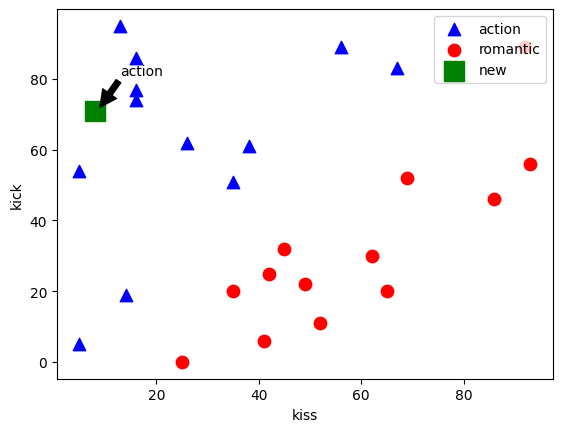

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 0~99 사이의 랜덤 값 25x2 ---①
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# trainDatat[0]:kick, trainData[1]:kiss, kick > kiss ? 1 : 0 ---②
responses = (trainData[:, 0] >trainData[:,1]).astype(np.float32)
# 0: action : 1romantic ---③
action = trainData[responses==0]
romantic = trainData[responses==1]
# action은 파랑 삼각형, romantic은 빨강색 동그라미로 표시 ---④
plt.scatter(action[:,0],action[:,1], 80, 'b', '^', label='action')
plt.scatter(romantic[:,0],romantic[:,1], 80, 'r', 'o',label="romantic")
# 새로운 데이타 생성, 0~99 랜덤 수 1X2, 초록색 사각형으로 표시 ---⑤
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],200,'g','s', label="new")

# Knearest 알고리즘 생성 및 훈련 --- ⑥
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
# 결과 예측 ---⑦
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)#K=3
print("ret:%s, result:%s, neighbours:%s, dist:%s" \
            %(ret, results, neighbours, dist))
# 새로운 결과에 화살표로 표시 ---⑧
anno_x, anno_y = newcomer.ravel()
label = "action" if results == 0 else "romantic"
plt.annotate(label, xy=(anno_x + 1, anno_y+1), \
            xytext=(anno_x+5, anno_y+10), arrowprops={'color':'black'})
plt.xlabel('kiss');plt.ylabel('kick')
plt.legend(loc="upper right")
plt.show()

### 9.3.2 손글씨 인식

In [ ]:
!python kNN_mnist.py

In [ ]:
import numpy as np, cv2
import mnist

# 훈련 데이타와 테스트 데이타 가져오기 ---①
train, train_labels = mnist.getTrain()
test, test_labels = mnist.getTest()
# kNN 객체 생성 및 훈련 ---②
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
# k값을 1~10까지 변경하면서 예측 ---③
for k in range(1, 11):
    # 결과 예측 ---④
    ret, result, neighbors, distance = knn.findNearest(test, k=k)
    # 정확도 계산 및 출력 ---⑤
    correct = np.sum(result == test_labels)
    accuracy = correct / result.size * 100.0
    print("K:%d, Accuracy :%.2f%%(%d/%d)" % (k, accuracy, correct, result.size) )

K:1, Accuracy :95.40%(477/500)
K:2, Accuracy :94.40%(472/500)
K:3, Accuracy :95.00%(475/500)
K:4, Accuracy :94.40%(472/500)
K:5, Accuracy :94.20%(471/500)
K:6, Accuracy :94.20%(471/500)
K:7, Accuracy :94.40%(472/500)
K:8, Accuracy :93.60%(468/500)
K:9, Accuracy :93.40%(467/500)
K:10, Accuracy :93.00%(465/500)


In [ ]:
!python kNN_handwritten.py

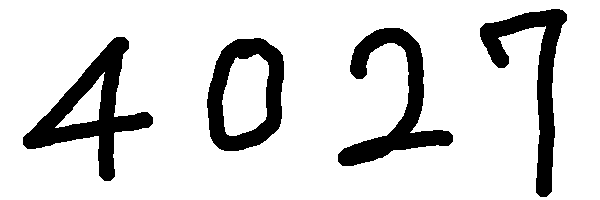

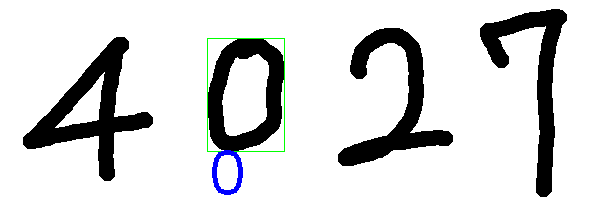

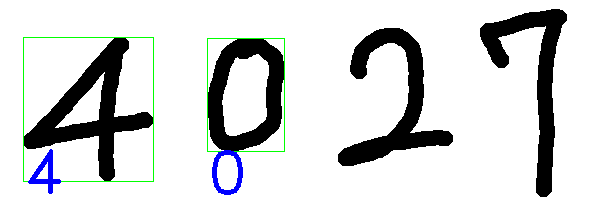

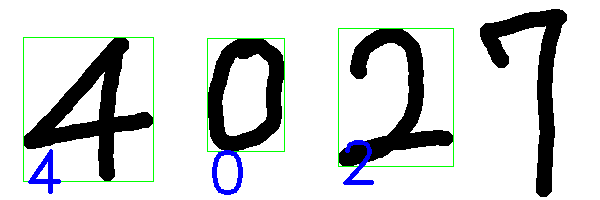

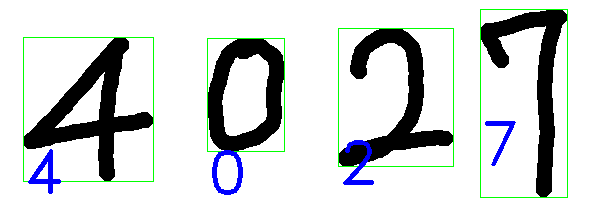

In [ ]:
import numpy as np, cv2
import mnist

# 훈련 데이타 가져오기 ---①
train, train_labels = mnist.getData()
# Knn 객체 생성 및 학습 ---②
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

# 인식시킬 손글씨 이미지 읽기 ---③
image = cv2.imread('../img/4027.png')
#cv2.imshow("image", image)
cv2_imshow(image)
cv2.waitKey(0)

# 그레이 스케일 변환과 스레시홀드 ---④
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
_, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
# 최외곽 컨투어만 찾기 ---⑤
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)[-2:]
# 모든 컨투어 순회 ---⑥
for c in contours:
    # 컨투어를 감싸는 외접 사각형으로 숫자 영역 좌표 구하기 ---⑦
    (x, y, w, h) = cv2.boundingRect(c)
    # 외접 사각형의 크기가 너무 작은것은 제외 ---⑧
    if w >= 5 and h >= 25:
        # 숫자 영역만 roi로 확보하고 사각형 그리기 ---⑨
        roi = gray[y:y + h, x:x + w]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        # 테스트 데이타 형식으로 변환 ---⑩
        data = mnist.digit2data(roi)
        # 결과 예측해서 이미지에 표시---⑪
        ret, result, neighbours, dist = knn.findNearest(data, k=1)
        cv2.putText(image, "%d"%ret, (x , y + 155), \
                        cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2)
        #cv2.imshow("image", image)
        cv2_imshow(image)
        cv2.waitKey(0)
cv2.destroyAllWindows()

##9.4 SVM과 HOG

### 9.4.1 SVM 알고리즘

In [ ]:
!python svm_random.py

return:0.0, results:[[0.]]


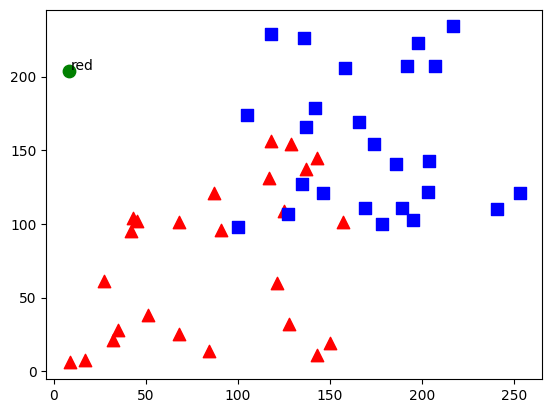

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 0~158 구간 임의의 수 25 x 2 생성   ---①
a = np.random.randint(0,158,(25,2))
# 98~255 구간 임의의 수 25 x 2 생성 ---②
b = np.random.randint(98, 255,(25,2))
# a, b를 병합, 50 x 2의 임의의 수 생성 ---③
trainData = np.vstack((a, b)).astype(np.float32)
# 0으로 채워진 50개 배열 생성 ---④
responses = np.zeros((50,1), np.int32)
# 25 ~ 50 까지 1로 변경 ---⑤
responses[25:] = 1

# 0과 같은 자리의 학습 데이타는 빨강색 삼각형으로 분류 및 표시 ---⑥
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# 1과 같은 자리의 학습 데이타는 파랑색 사각형으로 분류 및 표시 ---⑦
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
# 0~255 구간의 새로운 임의의 수 생성 및 초록색 원으로 표시 ---⑧
newcomer = np.random.randint(0,255,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
# SVM 알고리즘 객체 생성 및 훈련---⑨
svm = cv2.ml.SVM_create()

svm.trainAuto(trainData, cv2.ml.ROW_SAMPLE, responses)
# svm_random.xml 로 저장 ---⑩
svm.save('./svm_random.xml')
# 저장한 모델을 다시 읽기 ---⑪
svm2  = cv2.ml.SVM_load('./svm_random.xml')
# 새로운 임의의 수 예측 ---⑫
ret, results = svm2.predict(newcomer)
# 결과 표시 ---⑬
plt.annotate('red' if results[0]==0 else 'blue', xy=newcomer[0], xytext=(newcomer[0]+1))
print("return:%s, results:%s"%(ret, results))
plt.show()

### 9.4.2 HOG 디스크립터

In [ ]:
!python svm_mnist_hog_train.py

In [ ]:
import cv2
import numpy as np
import mnist
import time

# 기울어진 숫자를 바로 세우기 위한 함수 ---①
affine_flags = cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR
def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*20*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(20, 20),flags=affine_flags)
    return img

# HOGDescriptor를 위한 파라미터 설정 및 생성---②
winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (5,5)
nbins = 9
hogDesc = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)

if __name__ =='__main__':
    # MNIST 이미지에서 학습용 이미지와 테스트용 이미지 가져오기 ---③
    train_data, train_label  = mnist.getTrain(reshape=False)
    test_data, test_label = mnist.getTest(reshape=False)
    # 학습 이미지 글씨 바로 세우기 ---④
    deskewed = [list(map(deskew,row)) for row in train_data]
    # 학습 이미지 HOG 계산 ---⑤
    hogdata = [list(map(hogDesc.compute,row)) for row in deskewed]
    train_data = np.float32(hogdata)
    print('SVM training started...train data:', train_data.shape)
    # 학습용 HOG 데이타 재배열  ---⑥
    train_data = train_data.reshape(-1,train_data.shape[2])
    # SVM 알고리즘 객체 생성 및 훈련 ---⑦
    svm = cv2.ml.SVM_create()
    startT = time.time()
    svm.trainAuto(train_data, cv2.ml.ROW_SAMPLE, train_label)
    endT = time.time() - startT
    print('SVM training complete. %.2f Min'%(endT/60))
    # 훈련된  결과 모델 저장 ---⑧
    svm.save('svm_mnist.xml')

    # 테스트 이미지 글씨 바로 세우기 및 HOG 계산---⑨
    deskewed = [list(map(deskew,row)) for row in test_data]
    hogdata = [list(map(hogDesc.compute,row)) for row in deskewed]
    test_data = np.float32(hogdata)
    # 테스트용 HOG 데이타 재배열 ---⑩
    test_data = test_data.reshape(-1,test_data.shape[2])
    # 테스트 데이타 결과 예측 ---⑪
    ret, result = svm.predict(test_data)
    # 예측 결과와 테스트 레이블이 맞은 갯수 합산 및 정확도 출력---⑫
    correct = (result==test_label).sum()
    print('Accuracy: %.2f%%'%(correct*100.0/result.size))

SVM training started...train data: (50, 90, 324)


In [ ]:
!python svm_handwritten.py

In [ ]:
import cv2
import numpy as np
import mnist
import svm_mnist_hog_train


# 훈련해서 저장한 SVM 객체 읽기 ---①
svm = cv2.ml.SVM_load('./svm_mnist.xml')
# 인식할 손글씨 이미지 읽기 ---②
image = cv2.imread('../img/4027.png')
cv2.imshow("image", image)
cv2.waitKey(0)

# 인식할 이미지를 그레이 스케일로 변환 및 스레시홀드 적용 ---③
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
_, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 최외곽 컨투어만 찾기 ---④
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)[-2:]
for c in contours:
    # 컨투어를 감싸는 외접 사각형 구하기 ---⑤
    (x, y, w, h) = cv2.boundingRect(c)
    # 외접 사각형의 크기가 너무 작은것은 제외 ---⑥
    if w >= 5 and h >= 25:
        # 숫자 영역만 roi로 확보하고 사각형 그리기 ---⑦
        roi = gray[y:y + h, x:x + w]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        # 테스트 데이타 형식으로 변환 ---⑧
        px20 = mnist.digit2data(roi, False)
        # 기울어진 숫자를 바로 세우기 ---⑨
        deskewed = svm_mnist_hog_train.deskew(px20)
        # 인식할 숫자에 대한 HOG 디스크립터 계산 ---⑩
        hogdata = svm_mnist_hog_train.hogDesc.compute(deskewed)
        testData = np.float32(hogdata).reshape(-1, hogdata.shape[0])
        # 결과 예측해서 표시 ---⑪
        ret, result = svm.predict(testData)
        cv2.putText(image, "%d"%result[0], (x , y + 155), \
                        cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        #cv2.imshow("image", image)
        cv2_imshow(image)
        cv2.waitKey(0)
cv2.destroyAllWindows()

### 9.4.3 보행자 인식

In [ ]:
!python svm_hog_pedestrian.py

In [ ]:
import cv2

# default 디덱터를 위한 HOG 객체 생성 및 설정--- ①
hogdef = cv2.HOGDescriptor()
hogdef.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# dailer 디덱터를 위한 HOG 객체 생성 및 설정--- ②
hogdaim  = cv2.HOGDescriptor((48,96), (16,16), (8,8), (8,8), 9)
hogdaim.setSVMDetector(cv2.HOGDescriptor_getDaimlerPeopleDetector())

cap = cv2.VideoCapture('../img/walking.avi')
mode = True  # 모드 변환을 위한 플래그 변수
print('Toggle Space-bar to change mode.')
while cap.isOpened():
    ret, img = cap.read()
    if ret :
        if mode:
            # default 디텍터로 보행자 검출 --- ③
            found, _ = hogdef.detectMultiScale(img)
            for (x,y,w,h) in found:
                cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,255))
        else:
            # daimler 디텍터로 보행자 검출 --- ④
            found, _ = hogdaim.detectMultiScale(img)
            for (x,y,w,h) in found:
                cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0))
        cv2.putText(img, 'Detector:%s'%('Default' if mode else 'Daimler'), \
                        (10,50 ), cv2.FONT_HERSHEY_DUPLEX,1, (0,255,0),1)
        #cv2.imshow('frame', img)
        cv2_imshow(img)
        key = cv2.waitKey(1)
        if key == 27:
            break
        elif key == ord(' '):
            mode = not mode
    else:
        break
cap.release()
cv2.destroyAllWindows()

##9.5 BOW

### 9.5.1 BOW 알고리즘과 객체 인식

In [ ]:
!python bow_plane_bike_train.py

In [ ]:
import cv2
import numpy as np
import os, glob, time

# 각종 변수 선언---①
startT = time.time()                        # 소요시간 측정을 위한 시간 저장
categories =  ['airplanes', 'Motorbikes' ]  # 카테고리 이름
dictionary_size = 50                        # 사전 크기, 클러스터 갯수
base_path = "../img/101_ObjectCategories/"  # 학습 이미지 기본 경로
dict_file = './plane_bike_dict.npy'         # 사전 객체 저장할 파일 이름
svm_model_file = './plane_bike_svm.xml'     # SVM 모델 객체 저장할 파일 이름

# 추출기와 BOW 객체 생 --- ②
detector = cv2.xfeatures2d.SIFT_create()    # 추출기로 SIFT 생성
matcher = cv2.BFMatcher(cv2.NORM_L2)        # 매칭기로 BF 생성
bowTrainer = cv2.BOWKMeansTrainer(dictionary_size) # KMeans로 구현된 BWOTrainer 생성
bowExtractor = cv2.BOWImgDescriptorExtractor(detector, matcher) # 히스토그램 계산할 BOW추출기 생성

# 특징 디스크립터를 KMeansTrainer에 추가---③
train_paths = []                            # 훈련에 사용할 모든 이미지 경로
train_labels = []                           # 학습 데이타 레이블
print('Adding descriptor to BOWTrainer...')
for idx, category in enumerate(categories): # 카테고리 순회
    dir_path = base_path + category
    img_paths = glob.glob(dir_path +'/*.jpg')
    img_len = len(img_paths)
    for i, img_path in enumerate(img_paths): # 카테고리 내의 모든 이미지 파일 순회
        train_paths.append(img_path)
        train_labels.append(idx)            # 학습 데이타 레이블, 0 또는 1
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # 특징점과 특징 디스크립터 추출 및 bowTrainer에 추가 ---④
        kpt, desc= detector.detectAndCompute(gray, None)
        bowTrainer.add(desc)
        print('\t%s %d/%d(%.2f%%)' \
              %(category,i+1, img_len, (i+1)/img_len*100), end='\r')
    print()
print('Adding descriptor completed...')

# KMeans 클러스터로 군집화하여 시각 사전 생성 및 저장---⑤
print('Starting Dictionary clustering(%d)... \
        It will take several time...'%dictionary_size)
dictionary = bowTrainer.cluster() # 군집화로 시각 사전 생성
np.save(dict_file, dictionary)    # 시각 사전 데이타(넘파일)를 파일로 저장
print('Dictionary Clustering completed...dictionary shape:',dictionary.shape)

# 시각 사전과 모든 이미지의 매칭점으로 히스토그램 계산---⑥
bowExtractor.setVocabulary(dictionary)      # bowExtractor에 시각 사전 셋팅
train_desc = []                             # 학습 데이타
for i, path in enumerate(train_paths):      # 모든 학습 대상 이미지 순회
    img = cv2.imread(path)                  # 이미지 읽기
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 매칭점에 대한 히스토그램 계산 --- ⑦
    hist = bowExtractor.compute(gray, detector.detect(gray))
    train_desc.extend(hist)
    print('Compute histogram training set...(%.2f%%)'\
                    %((i+1)/len(train_paths)*100),end='\r')
print("\nsvm items", len(train_desc), len(train_desc[0]))

# 히스토그램을 학습데이타로 SVM 훈련 및 모델 저장---⑧
print('svm training...')
svm = cv2.ml.SVM_create()
svm.trainAuto(np.array(train_desc), cv2.ml.ROW_SAMPLE, np.array(train_labels))
svm.save(svm_model_file)
print('svm training completed.')
print('Training Elapsed: %s'\
        %time.strftime('%H:%M:%S', time.gmtime(time.time()-startT)))

# 원래의 이미지로 테스트 --- ⑨
print("Accuracy(Self)")
for label, dir_name in enumerate(categories):
    labels = []
    results = []
    img_paths = glob.glob(base_path + '/'+dir_name +'/*.*')
    for img_path in img_paths:
        labels.append(label)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        feature = bowExtractor.compute(gray, detector.detect(gray))
        ret, result = svm.predict(feature)
        resp = result[0][0]
        results.append(resp)

    labels = np.array(labels)
    results = np.array(results)
    err = (labels != results)
    err_mean = err.mean()
    print('\t%s: %.2f %%' % (dir_name, (1 - err_mean)*100))

In [ ]:
!python bow_plane_bike_test.py

In [ ]:
import cv2
import numpy as np

categories =  ['airplanes', 'Motorbikes' ]
dict_file = './plane_bike_dict.npy'
#dict_file = './plane_bike_dict_4000.npy'
svm_model_file = './plane_bike_svm.xml'
#svm_model_file = './plane_bike_svm_4000.xml'

# 테스트 할 이미지 경로 --- ①
imgs = ['../img/aircraft.jpg','../img/jetstar.jpg',
        '../img/motorcycle.jpg', '../img/motorbike.jpg']

# 특징 추출기(SIFT) 생성 ---②
detector = cv2.xfeatures2d.SIFT_create()
# BOW 추출기 생성 및 사전 로딩 ---③
bowextractor = cv2.BOWImgDescriptorExtractor(detector, \
                                cv2.BFMatcher(cv2.NORM_L2))
bowextractor.setVocabulary(np.load(dict_file))
# 훈련된 모델 읽어서 SVM 객체 생성 --- ④
svm  = cv2.ml.SVM_load(svm_model_file)

# 4개의 이미지 테스트
for i, path in enumerate(imgs):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 테스트 이미지에서 BOW 히스토그램 추출 ---⑤
    hist = bowextractor.compute(gray, detector.detect(gray))
    # SVM 예측 ---⑥
    ret, result = svm.predict(hist)
    # 결과 표시
    name = categories[int(result[0][0])]
    txt, base = cv2.getTextSize(name, cv2.FONT_HERSHEY_PLAIN, 2, 3)
    x,y = 10, 50
    cv2.rectangle(img, (x,y-base-txt[1]), (x+txt[0], y+txt[1]), (30,30,30), -1)
    cv2.putText(img, name, (x,y), cv2.FONT_HERSHEY_PLAIN, \
                                 2, (0,255,0), 2, cv2.LINE_AA)
    #cv2.imshow(path, img)
    cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##9.6 캐스케이드 분류기

### 9.6.1 하르 캐스케이드 얼굴 검출

In [ ]:
!python haar_face.py

In [ ]:
import numpy as np
import cv2

# 얼굴 검출을 위한 케스케이드 분류기 생성 --- ①
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
# 눈 검출을 위한 케스케이드 분류기 생성 ---②
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')
# 검출할 이미지 읽고 그레이 스케일로 변환 ---③
img = cv2.imread('../img/children.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 얼굴 검출 ---④
faces = face_cascade.detectMultiScale(gray)
# 검출된 얼굴 순회 ---⑤
for (x,y,w,h) in faces:
    # 검출된 얼굴에 사각형 표시 ---⑥
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 얼굴 영역을 ROI로 설정 ---⑦
    roi = gray[y:y+h, x:x+w]
    # ROI에서 눈 검출 ---⑧
    eyes = eye_cascade.detectMultiScale(roi)
    # 검출된 눈에 사각형 표 ---⑨
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img[y:y+h, x:x+w],(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
# 결과 출력
#cv2.imshow('img',img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!python haar_face_cam.py

In [ ]:
import cv2

# 얼굴과  검출을 위한 케스케이드 분류기 생성
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

# 카메라 캡쳐 활성화
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, img = cap.read()  # 프레임 읽기
    if ret:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # 얼굴 검출
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, \
                                        minNeighbors=5, minSize=(80,80))
        for(x,y,w,h) in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255,0),2)
            roi = gray[y:y+h, x:x+w]
            # 눈 검출
            eyes = eye_cascade.detectMultiScale(roi)
            for i, (ex, ey, ew, eh) in enumerate(eyes):
                if i >= 2:
                    break
                cv2.rectangle(img[y:y+h, x:x+w], (ex,ey), (ex+ew, ey+eh), \
                                    (255,0,0),2)
        #cv2.imshow('face detect', img)
        cv2_imshow(img)
    else:
        break
    if cv2.waitKey(5) == 27:
        break
cv2.destroyAllWindows()

### 9.6.2 LBPH 얼굴 인식

In [ ]:
!python lbp_face1_collect.py

In [ ]:
import cv2
import numpy as np
import os

# 변수 설정 ---①
base_dir = './faces/'   # 사진 저장할 디렉토리 경로
target_cnt = 400        # 수집할 사진 갯수
cnt = 0                 # 사진 촬영 수

# 얼굴 검출 분류기 생성 --- ②
face_classifier = cv2.CascadeClassifier(\
                    './data/haarcascade_frontalface_default.xml')

# 사용자 이름과 번호를 입력 받아 디렉토리 생성 ---③
name = input("Insert User Name(Only Alphabet):")
id = input("Insert User Id(Non-Duplicate number):")
dir = os.path.join(base_dir, name+'_'+ id)
if not os.path.exists(dir):
    os.mkdir(dir)

# 카메라 캡쳐
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        img = frame.copy()
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # 얼굴 검출 --- ④
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        if len(faces) == 1:
            (x,y,w,h) = faces[0]
            # 얼굴 영역 표시 및 파일 저장 ---⑤
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 1)
            face = gray[y:y+h, x:x+w]
            face = cv2.resize(face, (200, 200))
            file_name_path = os.path.join(dir,  str(cnt) + '.jpg')
            cv2.imwrite(file_name_path, face)
            cv2.putText(frame, str(cnt), (x, y), cv2.FONT_HERSHEY_COMPLEX, \
                             1, (0,255,0), 2)
            cnt+=1
        else:
            # 얼굴 검출이 없거나 1이상 인 경우 오류 표시 ---⑥
            if len(faces) == 0 :
                msg = "no face."
            elif len(faces) > 1:
                msg = "too many face."
            cv2.putText(frame, msg, (10, 50), cv2.FONT_HERSHEY_DUPLEX, \
                            1, (0,0,255))
        #cv2.imshow('face record', frame)
        cv2_imshow(frame)
        if cv2.waitKey(1) == 27 or cnt == target_cnt:
            break
cap.release()
cv2.destroyAllWindows()
print("Collecting Samples Completed.")

In [ ]:
!python lbp_face2_train.py

In [ ]:
import cv2
import numpy as np
import os, glob

# 변수 설정 --- ①
base_dir = './faces'
train_data, train_labels = [], []


dirs = [d for d in glob.glob(base_dir+"/*") if os.path.isdir(d)]
print('Collecting train data set:')
for dir in dirs:
    # name_id 형식에서 id를 분리 ---②
    id = dir.split('_')[1]
    files = glob.glob(dir+'/*.jpg')
    print('\t path:%s, %dfiles'%(dir, len(files)))
    for file in files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        # 이미지는 train_data, 아이디는 train_lables에 저장 ---③
        train_data.append(np.asarray(img, dtype=np.uint8))
        train_labels.append(int(id))

# NumPy 배열로 변환 ---④
train_data = np.asarray(train_data)
train_labels = np.int32(train_labels)

# LBP 얼굴인식기 생성 및 훈련 ---⑤
print('Starting LBP Model training...')
model = cv2.face.LBPHFaceRecognizer_create()
model.train(train_data, train_labels)
model.write('./faces/all_face.xml')
print("Model trained successfully!")

In [ ]:
!python lbp_face3_recognize.py

##9.7 실전 워크숍

### 9.7.1 얼굴 모자이크

In [ ]:
!python workshop_face_mosaic.py

In [ ]:
import cv2
import numpy as np
import os, glob

# 변수 설정 ---①
base_dir = './faces'
min_accuracy = 85

# LBP 얼굴 인식기 및 케스케이드 얼굴 검출기 생성 및 훈련 모델 읽기 ---②
face_classifier = cv2.CascadeClassifier(\
                './data/haarcascade_frontalface_default.xml')
model = cv2.face.LBPHFaceRecognizer_create()
model.read(os.path.join(base_dir, 'all_face.xml'))

# 디렉토리 이름으로 사용자 이름과 아이디 매핑 정보 생성 ---③
dirs = [d for d in glob.glob(base_dir+"/*") if os.path.isdir(d)]
names = dict([])
for dir in dirs:
    dir = os.path.basename(dir)
    name, id = dir.split('_')
    names[int(id)] = name

# 카메라 캡처 장치 준비
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("no frame")
        break
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # 얼굴 검출 ---④
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        # 얼굴 영역 표시하고 샘플과 같은 크기로 축소 ---⑤
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        # LBP 얼굴 인식기로 예측 ---⑥
        label, confidence = model.predict(face)
        if confidence < 400:
            # 정확도 거리를 퍼센트로 변환 ---⑦
            accuracy = int( 100 * (1 -confidence/400))
            if accuracy >= min_accuracy:
                msg =  '%s(%.0f%%)'%(names[label], accuracy)
            else:
                msg = 'Unknown'
        # 사용자 이름과 정확도 결과 출력 ---⑧
        txt, base = cv2.getTextSize(msg, cv2.FONT_HERSHEY_PLAIN, 1, 3)
        cv2.rectangle(frame, (x,y-base-txt[1]), (x+txt[0], y+txt[1]), \
                    (0,255,255), -1)
        cv2.putText(frame, msg, (x, y), cv2.FONT_HERSHEY_PLAIN, 1, \
                    (200,200,200), 2,cv2.LINE_AA)
    #cv2.imshow('Face Recognition', frame)
    cv2_imshow(frame)
    if cv2.waitKey(1) == 27: #esc
        break
cap.release()
cv2.destroyAllWindows()

### 9.7.2 한니발 마스크 필터 만들기

In [ ]:
!python workshop_hannibal_mask.py

In [ ]:
import cv2
import numpy as np

# 마스크 이미지 읽기
face_mask = cv2.imread('../img/mask_hannibal.png')
h_mask, w_mask = face_mask.shape[:2]
# 얼굴 검출기 생성
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	# 얼굴 영역 검출
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in face_rects:
        if h > 0 and w > 0:
        		# 마스크 위치 보정
            x = int(x + 0.1*w)
            y = int(y + 0.4*h)
            w = int(0.8 * w)
            h = int(0.8 * h)

            frame_roi = frame[y:y+h, x:x+w]
            # 마스크 이미지를 얼굴 크기에 맞게 조정
            face_mask_small = cv2.resize(face_mask, (w, h), \
                                interpolation=cv2.INTER_AREA)
			# 마스크 이미지 합성
            gray_mask = cv2.cvtColor(face_mask_small, cv2.COLOR_BGR2GRAY)
            ret, mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY)
            mask_inv = cv2.bitwise_not(mask)
            masked_face = cv2.bitwise_and(face_mask_small, face_mask_small,\
                                         mask=mask)
            masked_frame = cv2.bitwise_and(frame_roi, frame_roi, mask=mask_inv)
            frame[y:y+h, x:x+w] = cv2.add(masked_face, masked_frame)

    cv2.imshow('Hanibal Mask', frame)
    if cv2.waitKey(1) == 27:
        break
cap.release()
cv2.destroyAllWindows()

### 9.7.3 얼굴 왜곡 필터 만들기

In [ ]:
!python workshop_face_distotion_camera.py

In [ ]:
import cv2
import numpy as np

# 얼굴과 눈동자 검출기 생성
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

# 렌즈 왜곡 효과 함수
def distortedMap(rows, cols, type=0):
    map_y, map_x = np.indices((rows, cols), dtype=np.float32)
    # 렌즈 효과
    ## 렌즈 효과, 중심점 이동
    map_lenz_x = (2*map_x - cols)/cols
    map_lenz_y = (2*map_y - rows)/rows
    ## 렌즈 효과, 극좌표 변환
    r, theta = cv2.cartToPolar(map_lenz_x, map_lenz_y)
    if type==0:
    ## 볼록 렌즈 효과 매핑 좌표 연산
        r[r< 1] = r[r<1] **3
    else:
    ## 오목 렌즈 효과 매핑 좌표 연산
        r[r< 1] = r[r<1] **0.5
    ## 렌즈 효과, 직교 좌표 복원
    mapx, mapy = cv2.polarToCart(r, theta)
    ## 렌즈 효과, 좌상단 좌표 복원
    mapx = ((mapx + 1)*cols)/2
    mapy = ((mapy + 1)*rows)/2
    return (mapx, mapy)

# 얼굴 검출 함수
def findFaces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    face_coords = []
    for (x,y,w,h) in faces:
        face_coords.append((x, y, w, h))
    return face_coords
# 눈 검출 함수
def findEyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    eyes_coords = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray )
        for(ex,ey,ew,eh) in eyes:
            eyes_coords.append((ex+x,ey+y,ew,eh))
    return eyes_coords


cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)

while True:
    ret, frame = cap.read()
    img1 = frame.copy()
    img2 = frame.copy()
    # 얼굴 검출해서 오목/볼록 렌즈 효과로 왜곡 적용
    faces = findFaces(frame)
    for face in faces:
        x,y,w,h = face
        mapx, mapy = distortedMap(w,h, 1)
        roi = img1[y:y+h, x:x+w]
        convex = cv2.remap(roi,mapx,mapy,cv2.INTER_LINEAR)
        img1[y:y+h, x:x+w] = convex
    # 눈 영역 검출해서 볼록 렌즈 효과로 왜곡 적용
    eyes = findEyes(frame)
    for eye in eyes :
        x,y,w,h = eye
        mapx, mapy = distortedMap(w,h)
        roi = img2[y:y+h, x:x+w]
        convex = cv2.remap(roi,mapx,mapy,cv2.INTER_LINEAR)
        img2[y:y+h, x:x+w] = convex
    # 하나의 이미지로 병합해서 출력
    merged = np.hstack((frame, img1, img2))
    #cv2.imshow('Face Distortion', merged)
    cv2_imshow(merged)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()

In [ ]:
%cd /content/insightbook.opencv_project_python/10.apdx

In [ ]:
!python face_landmark.py

In [ ]:
import cv2
import dlib

# 얼굴 검출기와 랜드마크 검출기 생성 --- ①
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

img = cv2.imread("../img/man_face.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 얼굴 영역 검출 --- ②
faces = detector(gray)
for rect in faces:
    # 얼굴 영역을 좌표로 변환 후 사각형 표시 --- ③
    x,y = rect.left(), rect.top()
    w,h = rect.right()-x, rect.bottom()-y
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

    # 얼굴 랜드마크 검출 --- ④
    shape = predictor(gray, rect)
    for i in range(68):
        # 부위별 좌표 추출 및 표시 --- ⑤
        part = shape.part(i)
        cv2.circle(img, (part.x, part.y), 2, (0, 0, 255), -1)
        cv2.putText(img, str(i), (part.x, part.y), cv2.FONT_HERSHEY_PLAIN, \
                                         0.5,(255,255,255), 1, cv2.LINE_AA)

#cv2.imshow("face landmark", img)
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
!python face_landmark_cam.py

In [ ]:
import cv2
import dlib

# 얼굴 검출기와 랜드마크 검출기 생성 --- ①
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

cap = cv2.VideoCapture(0)
#cap.set(cv2.cv2.CAP_PROP_FRAME_WIDTH, 480)
#cap.set(cv2.cv2.CAP_PROP_FRAME_HEIGHT, 320)

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        print('no frame.');break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 얼굴 영역 검출 --- ②
    faces = detector(gray)
    for rect in faces:
        # 얼굴 영역을 좌표로 변환 후 사각형 표시 --- ③
        x,y = rect.left(), rect.top()
        w,h = rect.right()-x, rect.bottom()-y
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

        # 얼굴 랜드마크 검출 --- ④
        shape = predictor(gray, rect)
        for i in range(68):
            # 부위별 좌표 추출 및 표시 --- ⑤
            part = shape.part(i)
            cv2.circle(img, (part.x, part.y), 2, (0, 0, 255), -1)
            #cv2.putText(img, str(i), (part.x, part.y), cv2.FONT_HERSHEY_PLAIN, 0.5,(255,255,255), 1, cv2.LINE_AA)

    #cv2.imshow("face landmark", img)
    cv2_imshow(img)
    if cv2.waitKey(1)== 27:
        break
cap.release()

In [ ]:
!python face_delauney_triangle.py

In [ ]:
import cv2
import numpy as np
import dlib

# 얼굴 검출기와 랜드마크 검출기 생성 --- ①
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

img = cv2.imread("../img/man_face.jpg")
h, w = img.shape[:2]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 얼굴 영역 검출 --- ②
rects = faces = detector(gray)

points = []
for rect in rects:
    # 랜드마크 검출 --- ③
    shape = predictor(gray, rect)
    for i in range(68):
        part = shape.part(i)
        points.append((part.x, part.y))


# 들로네 삼각 분할 객체 생성 --- ④
x,y,w,h = cv2.boundingRect(np.float32(points))
subdiv = cv2.Subdiv2D((x,y,x+w,y+h))
# 랜드마크 좌표 추가 --- ⑤
subdiv.insert(points)
# 들로네 삼각형 좌표 계산 --- ⑥
triangleList = subdiv.getTriangleList()
# 들로네 삼각형 그리기 --- ⑦
h, w = img.shape[:2]
cnt = 0
for t in triangleList :
    pts = t.reshape(-1,2).astype(np.int32)
    # 좌표 중에 이미지 영역을 벗어나는 것을 제외(음수 등) ---⑧
    if (pts < 0).sum() or (pts[:, 0] > w).sum() or (pts[:, 1] > h).sum():
        print(pts)
        continue
    cv2.polylines(img, [pts], True, (255, 255,255), 1, cv2.LINE_AA)
    cnt+=1
print(cnt)


#cv2.imshow("Delaunay",img)
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
!python face_swap.py

In [ ]:
import cv2
import numpy as np
import dlib
import sys

# 얼굴 검출기와 랜드마크 검출기 생성 --- ①
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

# 얼굴 및 랜드마크 검출해서 좌표 반환하는 함수 ---②
def getPoints(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = detector(gray)
    points = []
    for rect in rects:
        shape = predictor(gray, rect)
        for i in range(68):
            part = shape.part(i)
            points.append((part.x, part.y))
    return points
# 랜드마크 좌표로 들로네 삼각형 반환 ---③
def getTriangles(img, points):
    w,h = img2.shape[:2]
    subdiv = cv2.Subdiv2D((0,0,w,h));
    subdiv.insert(points)
    triangleList = subdiv.getTriangleList();
    triangles = []
    for t in triangleList:
        pt = t.reshape(-1,2)
        if not (pt < 0).sum() and not (pt[:, 0] > w).sum() \
                              and not (pt[:, 1] > h).sum():
            indice = []
            for i in range(0, 3):
                for j in range(0, len(points)):
                    if(abs(pt[i][0] - points[j][0]) < 1.0 \
                        and abs(pt[i][1] - points[j][1]) < 1.0):
                        indice.append(j)
            if len(indice) == 3:
                triangles.append(indice)
    return triangles

# 삼각형 어핀 변환 함수 ---④
def warpTriangle(img1, img2, pts1, pts2):
    x1,y1,w1,h1 = cv2.boundingRect(np.float32([pts1]))
    x2,y2,w2,h2 = cv2.boundingRect(np.float32([pts2]))

    roi1 = img1[y1:y1+h1, x1:x1+w1]
    roi2 = img2[y2:y2+h2, x2:x2+w2]

    offset1 = np.zeros((3,2), dtype=np.float32)
    offset2 = np.zeros((3,2), dtype=np.float32)
    for i in range(3):
        offset1[i][0], offset1[i][1] = pts1[i][0]-x1, pts1[i][1]-y1
        offset2[i][0], offset2[i][1] = pts2[i][0]-x2, pts2[i][1]-y2

    mtrx = cv2.getAffineTransform(offset1, offset2)
    warped = cv2.warpAffine( roi1, mtrx, (w2, h2), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101 )

    mask = np.zeros((h2, w2), dtype = np.uint8)
    cv2.fillConvexPoly(mask, np.int32(offset2), (255))

    warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
    roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
    roi2_masked = roi2_masked + warped_masked
    img2[y2:y2+h2, x2:x2+w2] = roi2_masked

if __name__ == '__main__' :
    # 이미지 읽기 ---⑤
    img1 = cv2.imread('../img/boy_face.jpg')
    img2 = cv2.imread('../img/girl_face.jpg')
    cv2.imshow('img1', img1)
    cv2.imshow('img2', img2)
    img_draw = img2.copy()
    # 각 이미지에서 얼굴 랜드마크 좌표 구하기--- ⑥
    points1 = getPoints(img1)
    points2 = getPoints(img2)
    # 랜드마크 좌표로 볼록 선체 구하기 --- ⑦
    hullIndex = cv2.convexHull(np.array(points2), returnPoints = False)
    hull1 = [points1[int(idx)] for idx in hullIndex]
    hull2 = [points2[int(idx)] for idx in hullIndex]
    # 볼록 선체 안 들로네 삼각형 좌표 구하기 ---⑧
    triangles = getTriangles(img2, hull2)

    # 각 삼각형 좌표로 삼각형 어핀 변환 ---⑨
    for i in range(0, len(triangles)):
        t1 = [hull1[triangles[i][j]] for j in range(3)]
        t2 = [hull2[triangles[i][j]] for j in range(3)]
        warpTriangle(img1, img_draw, t1, t2)
    # 볼록선체를 마스크로 써서 얼굴 합성 ---⑩
    mask = np.zeros(img2.shape, dtype = img2.dtype)
    cv2.fillConvexPoly(mask, np.int32(hull2), (255, 255, 255))
    r = cv2.boundingRect(np.float32([hull2]))
    center = ((r[0]+int(r[2]/2), r[1]+int(r[3]/2)))
    output = cv2.seamlessClone(np.uint8(img_draw), img2, mask, center, \
                                cv2.NORMAL_CLONE)

    #cv2.imshow("Face Swapped", output)
    cv2_imshow(output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()